# Thresholding Segmentation

#### Key Points:
- **Global vs. Local Thresholding**: Using single vs. varying thresholds across the image.
- **Adaptive Thresholding**: Techniques like mean and Gaussian adaptive thresholding for varying conditions.
- **Thresholding Techniques**:
  - **Simple Thresholding**
  - **Otsu’s Method**
  - **Iterative Thresholding**
- **Performance Metrics**: Evaluating using accuracy, precision, recall, and F1 score.

#### Additional Considerations:
- **Noise Handling**: Preprocessing to reduce noise.
- **Post-Processing**: Morphological operations for refining segments.
- **Practical Applications**: Medical imaging, document analysis, industrial defect detection.
- **Challenges and Limitations**: Sensitivity to noise, lighting conditions, and threshold choice.


## Histogram based Image Segmentation

Histogram-based segmentation primarily fits under the Thresholding category which is one of the simplest segmentation methods. Histogram-based methods analyze the intensity distribution (histogram) of the pixels in an image and use that information to set a threshold. Otsu’s method, for example, is a classic global thresholding technique that automatically determines a threshold value by analyzing the histogram to minimize the intra-class variance of the segmented foreground and background. This is a typical use of a histogram for segmentation.

### Key Points:
- **Histogram Analysis**: Analyzing the histogram to determine optimal threshold values by identifying peaks and valleys.
- **Automatic Thresholding**: Techniques such as Otsu’s method to automatically find optimal threshold values.
- **Multi-Level Thresholding**: Using multiple thresholds for segmenting into more than two regions.
- **Histogram Equalization**: Enhancing contrast to improve thresholding effectiveness.

### Otsu's Method for Automatic Thresholding

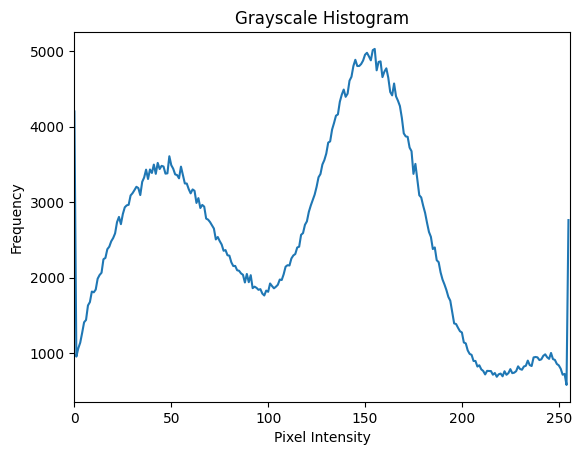

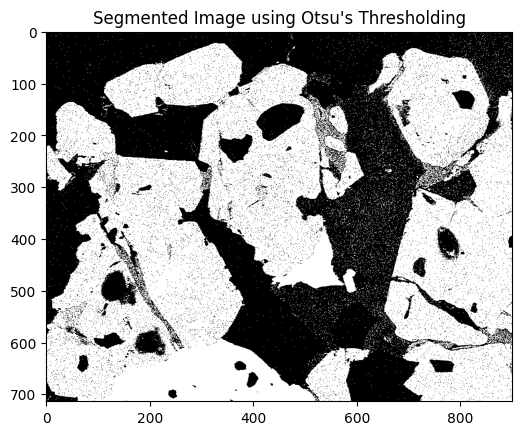

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (ensure it's grayscale)
img = cv2.imread("BSE_noisy.jpg", cv2.IMREAD_GRAYSCALE)

# Calculate the histogram of the image
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Display the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

# Apply Otsu's thresholding for segmentation
_, segmented_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the segmented image
plt.imshow(segmented_img, cmap='gray')
plt.title('Segmented Image using Otsu\'s Thresholding')
plt.show()


### `cv2.threshold` with Otsu's Binarization

1. **`src`**: Input grayscale image.
2. **`thresh`**: Threshold value (unused with Otsu’s method, set to `0`).
3. **`maxValue`**: Maximum intensity value for thresholded pixels (e.g., `255`).
4. **`type`**: Type of thresholding:
   - `cv2.THRESH_BINARY`: Pixels above threshold set to `maxValue`, others to `0`.
   - **Otsu's Method**: Automatically calculates an optimal threshold value to minimize variance between classes.
   - Use `cv2.THRESH_BINARY + cv2.THRESH_OTSU` for Otsu's binarization.

### Otsu's Thresholding Combinations:

1. **`cv2.THRESH_BINARY + cv2.THRESH_OTSU`**:
   - **Binary Threshold**: Pixels below the threshold are set to `0`, and those above the threshold are set to the `maxValue` (255).
   - **Use case**: Separating the foreground from the background when the foreground is brighter.

2. **`cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU`**:
   - **Inverse Binary Threshold**: Pixels below the threshold are set to the `maxValue` (255), and those above the threshold are set to `0`.
   - **Use case**: When the background is brighter than the foreground and you want to invert the result.

3. **`cv2.THRESH_TRUNC + cv2.THRESH_OTSU`**:
   - **Truncate Threshold**: Pixel values above the threshold are set to the threshold value, while those below remain unchanged.
   - **Use case**: Helps limit bright areas without completely eliminating them. Good for balancing intensity.

4. **`cv2.THRESH_TOZERO + cv2.THRESH_OTSU`**:
   - **To Zero Threshold**: Pixels below the threshold are set to `0`, and pixels above remain unchanged.
   - **Use case**: Useful when you want to preserve details in the bright areas but ignore the darker regions.

5. **`cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU`**:
   - **Inverse To Zero Threshold**: Pixels above the threshold are set to `0`, and pixels below remain unchanged.
   - **Use case**: Opposite of the previous. Keeps the details in the darker regions and ignores the bright areas.

### Differences:
- **Binary vs Inverse**: One sets pixels above the threshold to `255`, the other does the opposite.
- **Truncate**: Limits bright pixels by setting them to the threshold.
- **To Zero**: Either eliminates dark pixels (`ToZero`) or bright pixels (`ToZero Inv`) while preserving details.


### Importance of Denoising in Image Segmentation

1. **Improves Segmentation Accuracy**  
   Noise distorts pixel intensity distributions, making it harder to differentiate between regions. Denoising creates a cleaner histogram, leading to more accurate thresholding and segmentation.

2. **Reduces False Edges**  
   Noise introduces spurious edges and artifacts. Denoising removes these, ensuring real edges and regions are detected during segmentation.

3. **Enhances Object Detection**  
   Subtle details or low-contrast objects may be obscured by noise. Denoising highlights these objects, making them more visible for segmentation.

4. **Improves Thresholding Methods**  
   Noise affects both global (e.g., Otsu’s) and local thresholding methods. Denoising ensures accurate thresholds are applied based on clean intensity patterns.

5. **Smoothens the Histogram**  
   Noisy images create jagged histograms, making it difficult to set thresholds. Denoising smooths the intensity distribution for clearer segmentation.

6. **Critical for Specialized Fields**  
   In medical or satellite imaging, denoising reduces equipment-related noise, enhancing the ability to detect small or subtle structures.

7. **Facilitates Post-Processing Tasks**  
   Denoising helps in achieving better results in post-segmentation tasks like contour detection and object classification.


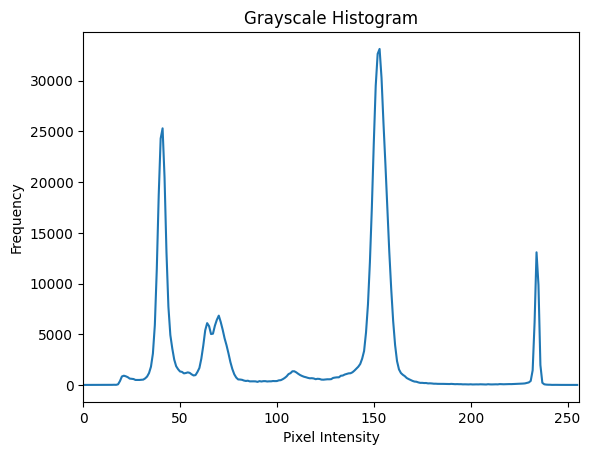

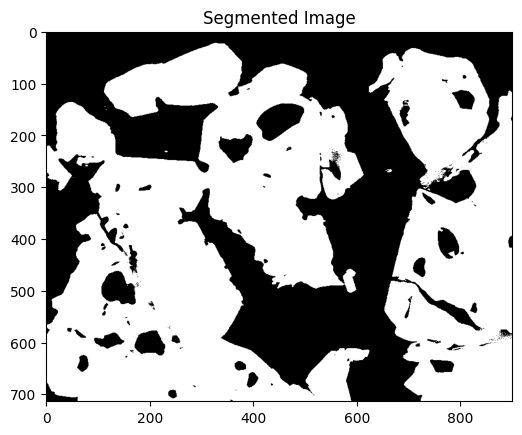

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image using OpenCV (ensure it's in grayscale)
img = cv2.imread("BSE_noisy.jpg", cv2.IMREAD_GRAYSCALE)

# Denoising using OpenCV's fastNlMeansDenoising
denoise = cv2.fastNlMeansDenoising(img, None, h=30, templateWindowSize=7, searchWindowSize=21)

# Histogram Calculation and Thresholding
# Calculate the histogram
hist = cv2.calcHist([denoise], [0], None, [256], [0, 256])

# Display the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

# Segmentation using Otsu's Thresholding
_, segmented_img = cv2.threshold(denoise, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the segmented image
plt.imshow(segmented_img, cmap='gray')
plt.title('Segmented Image')
plt.show()

### Adaptive Thresholding for Automatic Thresholding

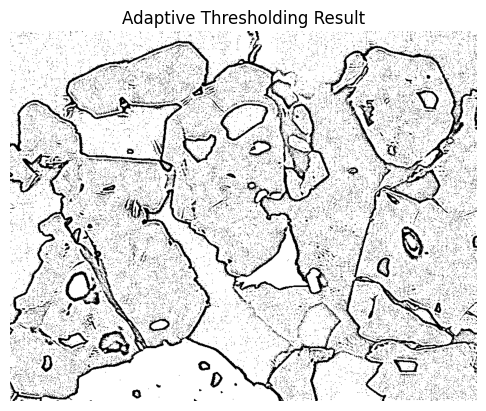

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to grayscale
img = cv2.imread("BSE_noisy.jpg", cv2.IMREAD_GRAYSCALE)

# Denoising
denoise = cv2.fastNlMeansDenoising(img, None, h=30, templateWindowSize=7, searchWindowSize=21)

# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(denoise, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

# Display the result
plt.figure()
plt.title("Adaptive Thresholding Result")
plt.imshow(adaptive_thresh, cmap='gray')
plt.axis('off')
plt.show()

### `cv2.adaptiveThreshold` Parameters

1. **`src`**: Input grayscale image.
2. **`maxValue`**: Maximum intensity value for thresholded pixels. Typically `255`.
3. **`adaptiveMethod`**: Method to calculate threshold:
   - `cv2.ADAPTIVE_THRESH_MEAN_C`: Mean of neighborhood.
   - `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`: Weighted sum (Gaussian) of neighborhood.
4. **`thresholdType`**: Type of thresholding:
   - `cv2.THRESH_BINARY`: Pixels above threshold set to `maxValue`, others to `0`.
   - `cv2.THRESH_BINARY_INV`: Inverse binary threshold.
5. **`blockSize`**: Size of neighborhood for threshold calculation (must be odd, e.g., `11`).
6. **`C`**: Constant subtracted from mean or weighted mean (e.g., `C=2`).

## Manual Thresholding

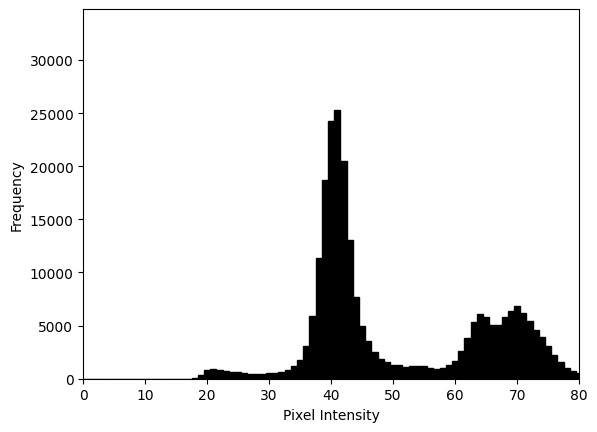

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image using OpenCV (ensure it's in grayscale)
img = cv2.imread("BSE_noisy.jpg", cv2.IMREAD_GRAYSCALE)

# Denoising using OpenCV's fastNlMeansDenoising
denoise = cv2.fastNlMeansDenoising(img, None, h=30, templateWindowSize=7, searchWindowSize=21)

# Histogram Calculation and Thresholding
# Calculate the histogram with 256 bins
hist, bins = np.histogram(denoise.flatten(), bins=256, range=[0, 256])

# Display the histogram
plt.figure()
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Plot histogram as a bar chart
plt.bar(bins[:-1], hist, width=(bins[1] - bins[0]), color='black', edgecolor='black')
plt.xlim([0, 80])
plt.show()


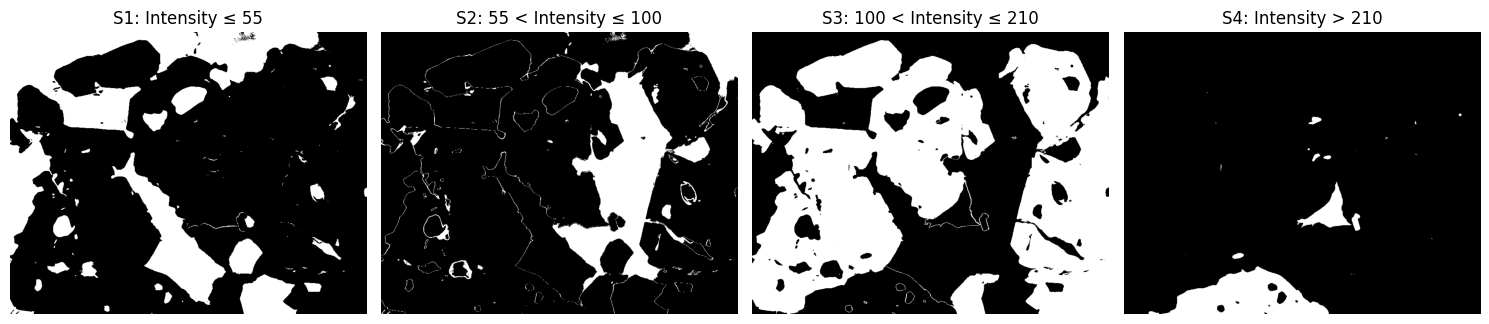

In [12]:
# Define manual segmentation based on intensity ranges
# Segmentation should use the original image, not the normalized one
s1 = (denoise <= 55)             # Segment S1: Intensity ≤ 55
s2 = (denoise > 55) & (denoise <= 100)  # Segment S2: 55 < Intensity ≤ 100
s3 = (denoise > 100) & (denoise <= 210) # Segment S3: 100 < Intensity ≤ 210
s4 = (denoise > 210)             # Segment S4: Intensity > 210

# Visualize the segments
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

ax[0].imshow(s1, cmap='gray')
ax[0].set_title('S1: Intensity ≤ 55')

ax[1].imshow(s2, cmap='gray')
ax[1].set_title('S2: 55 < Intensity ≤ 100')

ax[2].imshow(s3, cmap='gray')
ax[2].set_title('S3: 100 < Intensity ≤ 210')

ax[3].imshow(s4, cmap='gray')
ax[3].set_title('S4: Intensity > 210')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

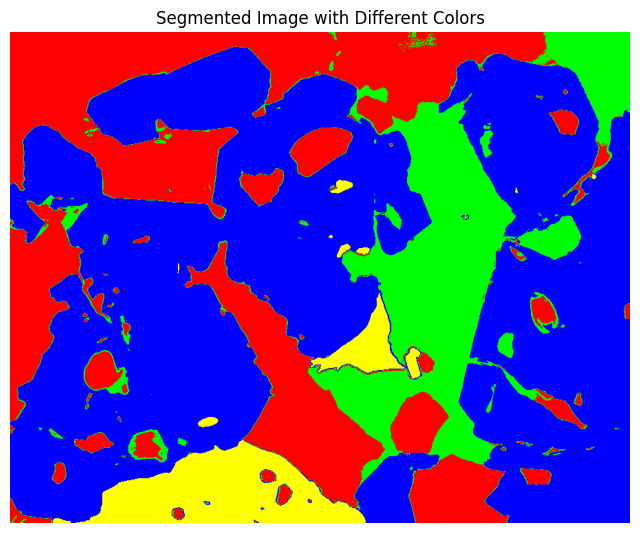

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image using OpenCV (ensure it's in grayscale)
img = cv2.imread("BSE_noisy.jpg", cv2.IMREAD_GRAYSCALE)

# Denoising using OpenCV's fastNlMeansDenoising
denoise = cv2.fastNlMeansDenoising(img, None, h=30, templateWindowSize=7, searchWindowSize=21)

# Define manual segmentation based on intensity ranges
s1 = (denoise <= 55)             # Segment S1: Intensity ≤ 55
s2 = (denoise > 55) & (denoise <= 100)  # Segment S2: 55 < Intensity ≤ 100
s3 = (denoise > 100) & (denoise <= 210) # Segment S3: 100 < Intensity ≤ 210
s4 = (denoise > 210)             # Segment S4: Intensity > 210

# Create an RGB image with segments colored differently
colored_img = np.zeros((denoise.shape[0], denoise.shape[1], 3), dtype=np.uint8)

# Assign colors to each segment
colored_img[s1] = [255, 0, 0]    # Red for S1
colored_img[s2] = [0, 255, 0]    # Green for S2
colored_img[s3] = [0, 0, 255]    # Blue for S3
colored_img[s4] = [255, 255, 0]  # Yellow for S4

# Display the colored segmented image
plt.figure(figsize=(8, 8))
plt.imshow(colored_img)
plt.title("Segmented Image with Different Colors")
plt.axis('off')
plt.show()

#### Multi-Level Thresholding (Other Approach)

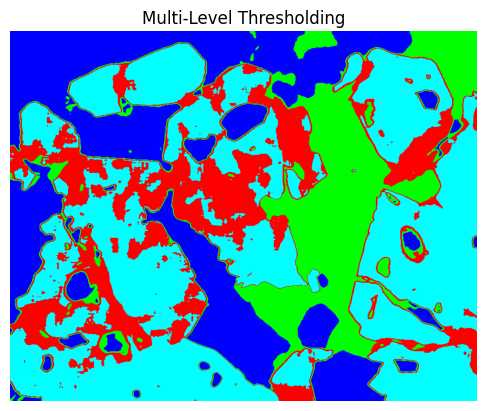

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("BSE_noisy.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Denoising using OpenCV's fastNlMeansDenoising
denoised = cv2.fastNlMeansDenoising(blurred, None, h=30, templateWindowSize=7, searchWindowSize=21)

# Manually set thresholds for multi-level segmentation
_, th1 = cv2.threshold(denoised, 50, 255, cv2.THRESH_BINARY)
_, th2 = cv2.threshold(denoised, 100, 255, cv2.THRESH_BINARY)
_, th3 = cv2.threshold(denoised, 150, 255, cv2.THRESH_BINARY)

# Create a 3-channel RGB image for colored segmentation
multi_level_segmentation = np.zeros((denoised.shape[0], denoised.shape[1], 3), dtype=np.uint8)

# Apply different colors to each segment
multi_level_segmentation[denoised <= 50] = [255, 0, 0]         # Red for first segment
multi_level_segmentation[(denoised > 50) & (denoised <= 100)] = [0, 255, 0]  # Green for second segment
multi_level_segmentation[(denoised > 100) & (denoised <= 150)] = [0, 0, 255] # Blue for third segment
multi_level_segmentation[denoised > 150] = [255, 255, 0]       # Yellow for fourth segment

# Display the multi-level segmentation with colors
plt.imshow(cv2.cvtColor(multi_level_segmentation, cv2.COLOR_BGR2RGB))
plt.title('Multi-Level Thresholding')
plt.axis('off')
plt.show()

>## Histogram Equalization

Histogram equalization is an important technique in image processing because it improves the contrast of images, which can make details more visible and enhance the effectiveness of subsequent image analysis tasks.

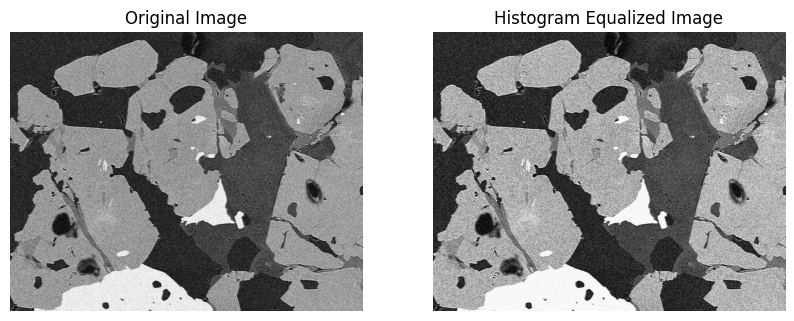

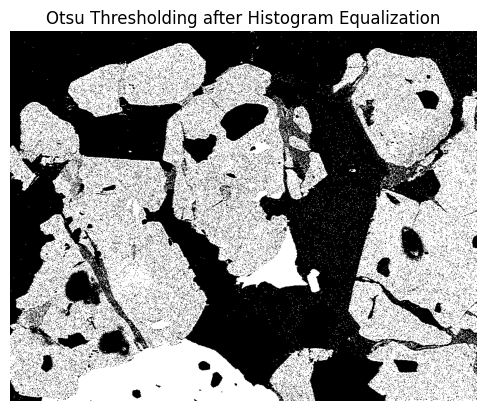

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("BSE_noisy.jpg", cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_img = cv2.equalizeHist(img)

# Apply Otsu's thresholding after histogram equalization
_, otsu_thresh = cv2.threshold(equalized_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display original and equalized image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(equalized_img, cmap='gray')
ax[1].set_title('Histogram Equalized Image')
ax[1].axis('off')

plt.show()

# Display Otsu's thresholded result
plt.imshow(otsu_thresh, cmap='gray')
plt.title('Otsu Thresholding after Histogram Equalization')
plt.axis('off')
plt.show()